<h1 style="text-align: center;"> P452 - Computational Physics</h1>
<h2 style="text-align: center;"> Assignment 3</h2>
<h3 style="text-align: center;"> Jyotirmaya Shivottam | 1711069</h3>

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from _1711069_assgn03_utils import mlcgList

1. Calculate the following integral:

$$
\int_0^1 e^{-x^2} \mathrm{d}x
$$
first by simple Monte Carlo without importance sampling and next with importance sampling with $p(x) = \alpha e^{-x}$, where $\alpha$ is a constant. [12]

In [3]:
def MCIntUnif(f:callable, lims:tuple, N:int=int(1e5)):
    a, b = lims
    # Sampling points uniformly in the specified interval using own MLCG
    reg = mlcgList(N, (a, b))

    try:
        fvec = np.vectorize(f)
        intg = np.sum(fvec(reg))
    except:
        intg = 0
        for i in reg:
            intg += np.sum(f(i))

    intg *= ((b - a) / N)

    return intg

In [4]:
# Function, to be integrated
def f(x):
	return np.exp(-x ** 2)

integral = MCIntUnif(f, (0, 1), N=int(1e6))
print(f"Integral, obtained by MC integration without importance sampling: {integral}.")

Integral, obtained by MC integration without importance sampling: 0.7468988385594078


Given distribution: $p(x) = \alpha\exp(-x)$. Since $\int_0^1p(x)\mathrm{d}x = 1$, we have: $\alpha = \frac{e}{e - 1}$.

Let $q(y)$ represent a uniform distribution in $y$. Then, we have:
$$
\begin{align*}
&|p(x)\mathrm{d}x| = |q(y)\mathrm{d}y| \\
&\implies p(x) = q(y)\left|\frac{\mathrm{d}y}{\mathrm{d}x}\right| \\
&\implies \alpha\exp(-x) = \left|\frac{\mathrm{d}y}{\mathrm{d}x}\right| \quad \{\because q(y) = 1\} \\
&\implies y(x) = \left[-\alpha\exp(-x)\right]_0^x \\
&\implies x(y) = -\ln\left(1 - \frac{y}{\alpha}\right) \\
\end{align*}
$$

Also, for Importance Sampling, we have:
$$
\int_0^1 e^{-x^2} \mathrm{d}x = \int_0^1 e^{-X^2} \cdot \frac{q(X)}{p(X)}\mathrm{d}x \approx \frac{1}{N}\sum_i^N e^{-X^2} \cdot \frac{1}{p(X)}
$$
where, $q$ and $p$ are defined as above and $X$ is sampled from $p$.

In [47]:
ALPHA = np.e / (np.e - 1)

def p(x, alpha:float=ALPHA):
    return alpha * np.exp(-x)

def uniform_to_p(y, alpha:float=ALPHA):
    return -np.log(1 - y / alpha)

def MCIntImp(f:callable, lims:tuple, N:int=int(1e5)):
    a, b = lims
    # Sampling points from the given distribution
    reg = mlcgList(N, (a, b))
    reg = uniform_to_p(reg)

    try:
        fvec = np.vectorize(f)
        intg = np.sum(fvec(reg) / p(reg))
    except:
        intg = 0
        for i in reg:
            intg += np.sum(f(i) / p(i))

    intg *= ((b - a) / N)

    return intg

In [48]:
integral = MCIntImp(f, (0, 1), N=int(1e6))
print(f"Integral, obtained by MC integration WITH importance sampling: {integral}.")

Integral, obtained by MC integration WITH importance sampling: 0.7467013889160391.


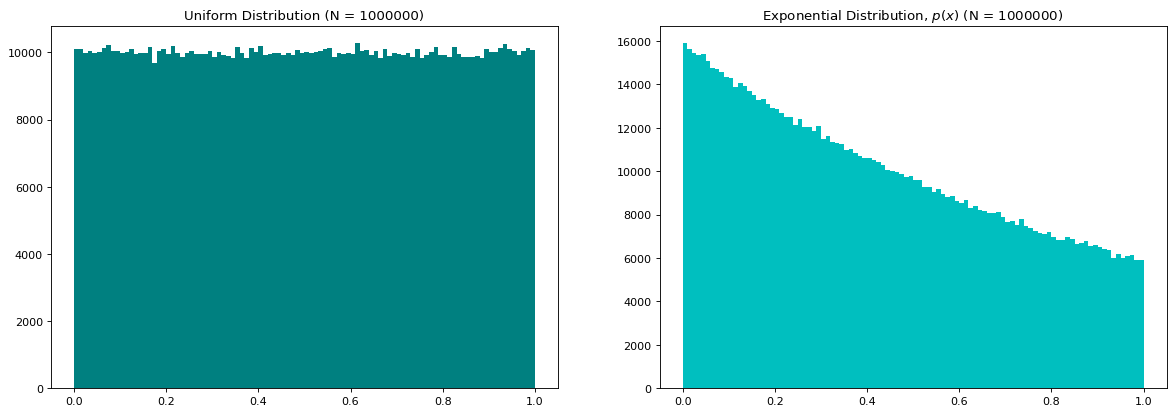

In [91]:
# Plots for the distributions
X_unif = mlcgList(int(1e6), (0, 1))
X_p = uniform_to_p(X_unif)

fig0, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax0.hist(X_unif, bins=100, color='teal')
ax0.set_title("Uniform Distribution (N = 1000000)")
ax1.hist(X_p, bins=100, color='c')
ax1.set_title("Exponential Distribution, $p(x)$ (N = 1000000)")
plt.show()

2. Use shooting method with RK4 integrator to solve Schrödinger equation for infinite square well potential, of unit width, for the two lowest energy state. [10]

In [87]:
# TODO:

3. Solve numerically the 2-dimensional Laplace’s equation with the boundary conditions, [8]
$$\phi(x, y = 0) = 1\:\text{Volt}, \: \phi(x, y = 1) = \phi(x = 0, y) = \phi(x = 1, y) = 1\:\text{Volt}$$

Discretizing Laplace Equation in 2D, i.e. $\phi_{xx} + \phi_{yy} = 0$, we get:
$$
\phi_{i, j} = \frac{1}{4}\left[\phi_{i + 1, j} + \phi_{i-1, j} + \phi_{i, j + 1} + \phi_{i, j - 1}\right]
$$
where, $i, j$ correspond to steps along $X$ and $Y$ directions.

Converged in 1748 iterations.


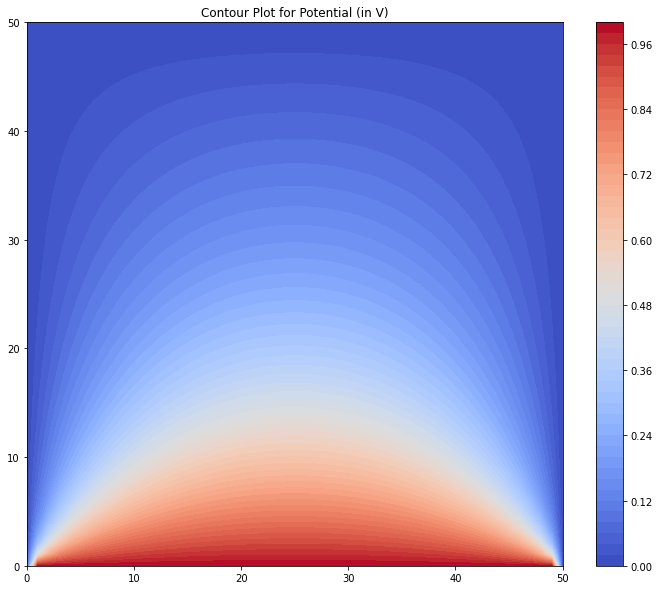

In [85]:
max_iter = 5000

# Set Dimension and delta
lenX = 50
lenY = 50
delta = 1

# Grid
N1, N2 = (lenX, lenY)
dimX = np.linspace(0, lenX, N1)
dimY = np.linspace(0, lenY, N2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')

# Boundary conditions
Φ_left = 0
Φ_right = 0
Φ_top = 0
Φ_bottom = 1

# Initial guess
Φ = np.zeros((lenX, lenY))

# Set Boundary condition
Φ[:, -1] = Φ_top
Φ[:, 0] = Φ_bottom
Φ[0, :] = Φ_right
Φ[-1, :] = Φ_left

for iter in range(0, max_iter):
    Φ_copy = Φ.copy()
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            Φ[i, j] = 0.25 * (Φ[i + 1][j] + Φ[i - 1][j] + Φ[i][j + 1] + Φ[i][j - 1])
    # Convergence check
    if np.allclose(Φ_copy, Φ):
        print(f"Converged in {iter} iterations.")
        break

# Contour Plot
colorinterpolation = 50
colourMap = plt.cm.coolwarm
plt.figure(figsize=(12, 10))
plt.title("Contour Plot for Potential (in V)")
plt.contourf(X, Y,  Φ, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()